In [12]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
images_path = "Vegetable Images"
train_path = "/train"
val_path = "/validation"
test_path = "/test"

In [14]:
def view_random_image(data_dir, class_dir, n_row=1, n_col=1):
    target_dir = images_path + "/" + data_dir + "/" + class_dir + "/"

    rand_images = random.sample(os.listdir(target_dir), 4)

    fig, axs = plt.subplots(n_row, n_col)

    for i, ax in enumerate(axs.flat):
        img = mpimg.imread(target_dir + rand_images[i])
        ax.imshow(img)
        ax.set_title(f"{class_dir} {i+1}\n{img.shape}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

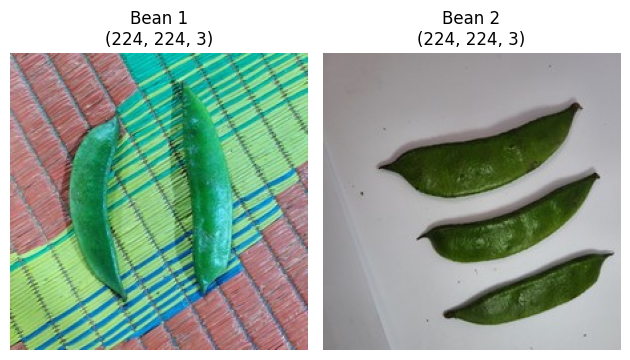

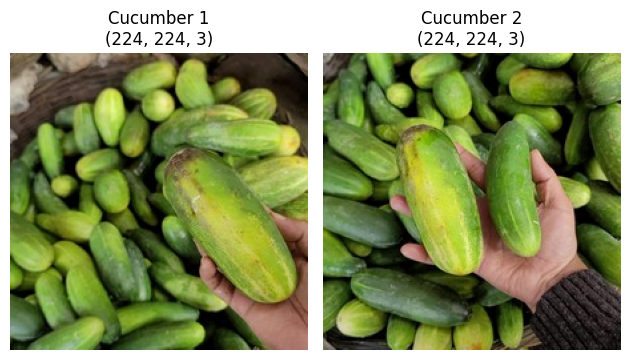

In [53]:
view_random_image("train", "Bean", 1, 2)
view_random_image("train", "Cucumber", 1, 2)

In [15]:
tf.random.set_seed(42)


train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

img_size = (150,150)

train_data = train_datagen.flow_from_directory(images_path + train_path,
                                               target_size=img_size,
                                               batch_size=32,
                                               class_mode='categorical', 
                                               seed=42)     

val_data = val_datagen.flow_from_directory(images_path + val_path,
                                           target_size=img_size,
                                           batch_size=32,
                                           class_mode='categorical',
                                           seed=42)
 
test_data = test_datagen.flow_from_directory(images_path + test_path,
                                             target_size=img_size,
                                             batch_size=32,
                                             class_mode='categorical',
                                             shuffle=False)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.optimizers import Adam

import scipy

In [56]:
import pickle

tf.random.set_seed(42)

model_1 = Sequential()

model_1.add(
    Conv2D(filters=20, kernel_size=(3, 3), activation="relu", input_shape=(150, 150, 3))
)
model_1.add(Conv2D(20, (3, 3), activation="relu"))
model_1.add(MaxPool2D((2, 2), padding="valid"))

model_1.add(Conv2D(50, (3, 3), activation="relu"))
model_1.add(Conv2D(50, (3, 3), activation="relu"))
model_1.add(MaxPool2D((2, 2)))

model_1.add(Flatten())
model_1.add(Dense(15, activation="softmax")) 

model_1.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"],
)

history_1 = model_1.fit(
        train_data,
        validation_data=val_data,
        epochs=10,
)
with open('model_history.pkl', 'wb') as file:
    pickle.dump(history_1.history, file)

Epoch 1/10
469/469 [==============================] - 142s 301ms/step - loss: 1.4590 - accuracy: 0.5111 - val_loss: 0.9463 - val_accuracy: 0.6970
Epoch 2/10
469/469 [==============================] - 132s 281ms/step - loss: 0.8296 - accuracy: 0.7302 - val_loss: 0.4853 - val_accuracy: 0.8570
Epoch 3/10
469/469 [==============================] - 129s 276ms/step - loss: 0.5920 - accuracy: 0.8107 - val_loss: 0.4906 - val_accuracy: 0.8477
Epoch 4/10
469/469 [==============================] - 129s 275ms/step - loss: 0.4674 - accuracy: 0.8511 - val_loss: 0.2767 - val_accuracy: 0.9180
Epoch 5/10
469/469 [==============================] - 128s 274ms/step - loss: 0.4033 - accuracy: 0.8728 - val_loss: 0.2597 - val_accuracy: 0.9200
Epoch 6/10
469/469 [==============================] - 125s 267ms/step - loss: 0.3563 - accuracy: 0.8913 - val_loss: 0.2336 - val_accuracy: 0.9323
Epoch 7/10
469/469 [==============================] - 118s 252ms/step - loss: 0.3063 - accuracy: 0.9030 - val_loss: 0.1932 -

In [9]:
from tensorflow.keras.models import load_model

# model_1.save("model_10_epochs.keras")

In [10]:
my_model_1 = load_model("model_10_epochs.keras")

In [17]:
my_model_1.evaluate(test_data)

94/94 [==============================] - 10s 66ms/step - loss: 0.3746 - accuracy: 0.9037


[0.374582439661026, 0.9036666750907898]

In [18]:
predictions = my_model_1.predict(test_data)

94/94 [==============================] - 6s 63ms/step


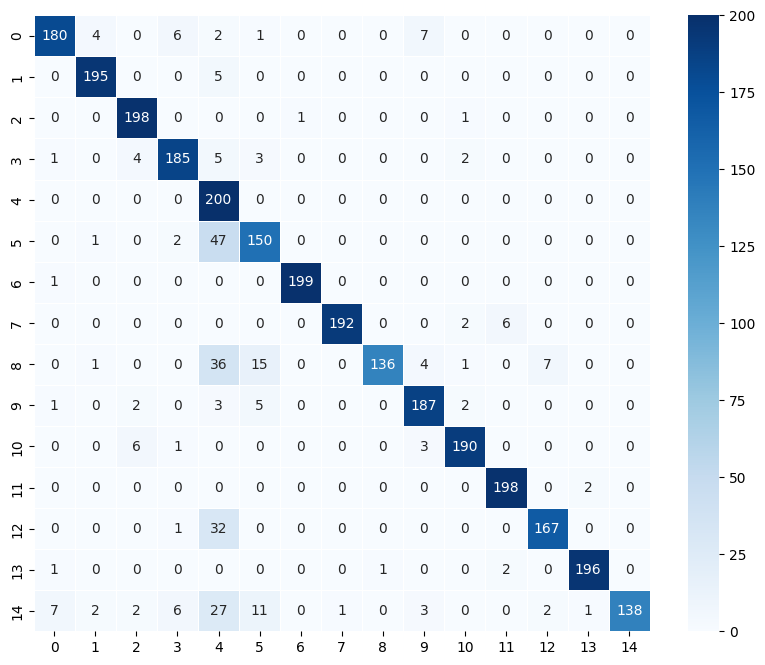

In [61]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Mengkonversi prediksi menjadi label kelas
y_pred_class = np.argmax(predictions, axis=1)
y_true_class = test_data.classes

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_true_class, y_pred_class),
    annot=True,
    annot_kws={"fontsize": 10},
    fmt=".0f",
    linewidth=0.5,
    square=True,
    cmap="Blues"
)
plt.show()


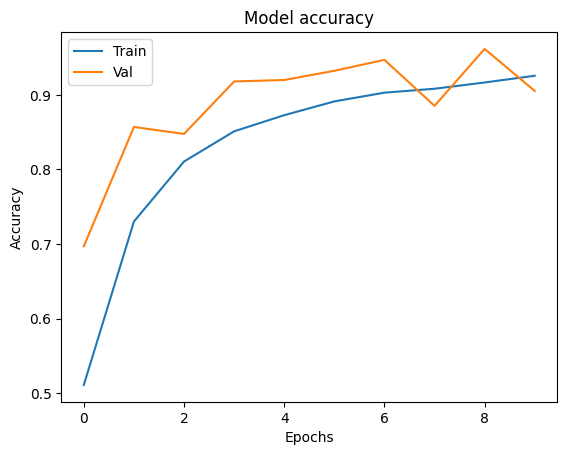

In [64]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

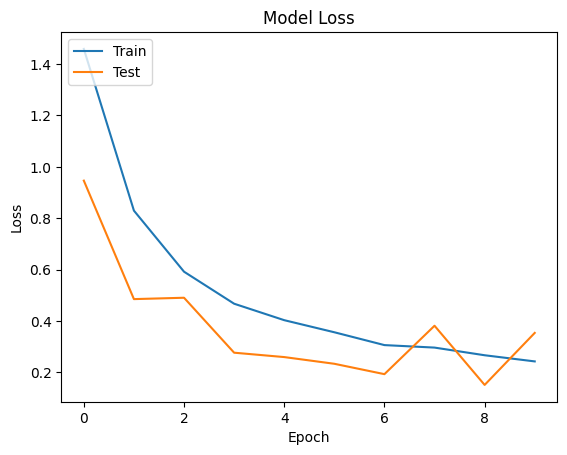

In [66]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [21]:
import pickle

with open('model_history.pkl', 'rb') as file:
    loaded_results = pickle.load(file)

print(loaded_results)

from sklearn.metrics import classification_report
import numpy as np

# Melakukan prediksi pada data uji
y_pred = my_model_1.predict(test_data)

# Mengubah hasil prediksi menjadi label kelas (kelas dengan probabilitas tertinggi)
y_pred_labels = np.argmax(y_pred, axis=1)

# Mengambil label yang sesuai dari data uji
y_true = test_data.classes

# Mendapatkan daftar nama kelas (jika Anda memiliki file 'class_indices' saat memuat data)
class_names = list(test_data.class_indices.keys())

# Membuat classification report
report = classification_report(y_true, y_pred_labels, target_names=class_names)

print(report)


{'loss': [1.4589715003967285, 0.8296208381652832, 0.5919607877731323, 0.46735629439353943, 0.40330803394317627, 0.35626086592674255, 0.3063029646873474, 0.2966040074825287, 0.2667993903160095, 0.2428285926580429], 'accuracy': [0.5110666751861572, 0.7301999926567078, 0.8106666803359985, 0.8511333465576172, 0.8727999925613403, 0.8912666440010071, 0.902999997138977, 0.9082666635513306, 0.9166666865348816, 0.9256666898727417], 'val_loss': [0.9463428258895874, 0.48528239130973816, 0.49058812856674194, 0.27674034237861633, 0.25967639684677124, 0.23360861837863922, 0.19322147965431213, 0.3816099464893341, 0.1513141691684723, 0.3537968397140503], 'val_accuracy': [0.6970000267028809, 0.8569999933242798, 0.8476666808128357, 0.9179999828338623, 0.9200000166893005, 0.9323333501815796, 0.9470000267028809, 0.8853333592414856, 0.9616666436195374, 0.9053333401679993]}
94/94 [==============================] - 5s 56ms/step
              precision    recall  f1-score   support

        Bean       0.94   

In [22]:
from sklearn.metrics import classification_report
import numpy as np

# Melakukan prediksi pada data uji
y_pred = my_model_1.predict(test_data)

# Mengubah hasil prediksi menjadi label kelas (kelas dengan probabilitas tertinggi)
y_pred_labels = np.argmax(y_pred, axis=1)

# Mengambil label yang sesuai dari data uji
y_true = test_data.classes

# Membuat classification report
report = classification_report(y_true, y_pred_labels, target_names=class_names, output_dict=True)

# Calculate total accuracy for each class
class_accuracies = {}
for class_name in class_names:
    class_precision = report[class_name]['precision']
    class_accuracies[class_name] = class_precision

print("Total Accuracy for Each Class:")
for class_name, accuracy in class_accuracies.items():
    print(f"{class_name}: {accuracy:.2f}")

94/94 [==============================] - 5s 56ms/step
Total Accuracy for Each Class:
Bean: 0.94
Bitter_Gourd: 0.96
Bottle_Gourd: 0.93
Brinjal: 0.92
Broccoli: 0.56
Cabbage: 0.81
Capsicum: 0.99
Carrot: 0.99
Cauliflower: 0.99
Cucumber: 0.92
Papaya: 0.96
Potato: 0.96
Pumpkin: 0.95
Radish: 0.98
Tomato: 1.00
